In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [23]:
#creating the dataset
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])     #(m,)

w=[0, 1]
b=1

In [27]:
#creating the formula
def f_sigmod(x, w, b):
    f=np.dot(x, w) + b 
    z = 1/(1+np.exp(-f))
    return z
print(f_sigmod(w, b, x_train[3]))

[0.95257413 0.81757448]


In [28]:
#creating the cost function
def c(x, y, w, b):
    m = x.shape[0]
    error = 0
    add = 0
    for i in range(m):
        error = y[i] * np.log(f_sigmod(x[i], w, b)) - (1 - y[i]) * np.log(1 - f_sigmod(x[i], w, b))
        add = add + error
    J = -(1 / m) * add
    return J
print(c(x_train, y_train, w, b))

-1.0212466625815266


In [29]:
#creating gradient for 1 iter
def g(w, b, x, y):
    m,num = x.shape
    w_add = 0
    b_add = 0
    w_error = np.zeros((num,))
    for i in range(m):
        err = (f_sigmod(x[i], w, b) - y[i])
        for n in range(num):
            w_error[n] = w_error[n] + (err*x[i,n])
            #w_add += w_error[i]
        b_error = (f_sigmod(x[i], w, b) - y[i])
        b_add += b_error

    w_one_m = w_error / m
    b_one_m = b_add / m
    #w = w - (a*w_one_m)
    #b = b - (a*b_one_m)

    return w_one_m, b_one_m
w_t, b_t = g(w, b, x_train, y_train)
print(w_t)
print(b_t)


[0.31629819 0.40274199]
0.39389162440250053


In [31]:
# Test data
x_train = np.array([[1, 2], [2, 3], [3, 4]])
y_train = np.array([0, 1, 1])
w = np.array([0.5, -0.5])
b = 0.1

# Compute the gradients
dw, db = g(w, b, x_train, y_train)
print("Gradient for weights (dw):", dw)
print("Gradient for bias (db):", db)

Gradient for weights (dw): [-0.86404199 -1.12939631]
Gradient for bias (db): -0.2653543267791187


In [32]:
#calculating gradient descent
def gd(w_in, b_in, x, y, a, c, g, iters):
    #m = x.shape[0]
    w_final = copy.deepcopy(w_in)
    b_final = b_in
    p = []
    w_g = 0
    b_g = 0
    for i in range(iters):
        w_g, b_g = g(w_final, b_final, x, y)
        w_final = w_final - (a*w_g)
        b_final = b_final - (a*b_g)
        if i % 10 == 0:
            p.append(c(x, y, w_final, b_final))
    return w_final, b_final, p
print(gd(w, b, x_train, y_train, 0.1, c, g, 1000))

(array([ 4.33620461, -0.8539088 ]), np.float64(-4.090113409899327), [np.float64(0.1673304199294591), np.float64(-0.1906220275363061), np.float64(-0.19530886185466606), np.float64(-0.18749651549299623), np.float64(-0.17928731680376042), np.float64(-0.1715251791915126), np.float64(-0.16424363195572333), np.float64(-0.15741488321601055), np.float64(-0.1510080284012612), np.float64(-0.14499373048927036), np.float64(-0.13934455513006255), np.float64(-0.1340349281717534), np.float64(-0.12904105206938662), np.float64(-0.12434081361255181), np.float64(-0.11991368838675276), np.float64(-0.11574064442285603), np.float64(-0.11180404676952567), np.float64(-0.10808756428443968), np.float64(-0.10457607959197747), np.float64(-0.1012556028723124), np.float64(-0.0981131899193138), np.float64(-0.09513686472417178), np.float64(-0.09231554670068143), np.float64(-0.0896389825599795), np.float64(-0.08709768276127308), np.float64(-0.08468286240569119), np.float64(-0.08238638639845178), np.float64(-0.08020071

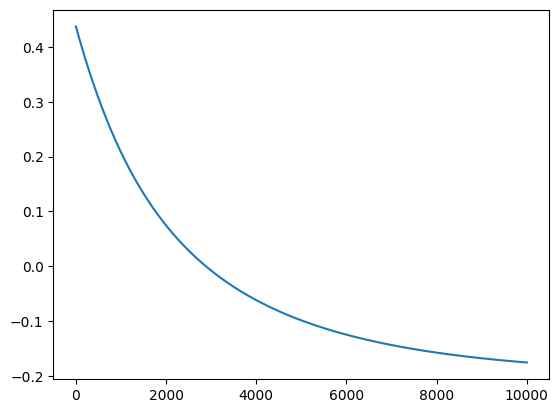

In [40]:
#graphing out graident descent to check if it is working properly.
w_graph, b_graph, p = gd(w, b, x_train, y_train, 0.00001, c, g, 100000)
p_iters = np.arange(len(p))
plt.plot(p_iters, p)